# Tải các thư viện cần thiết

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.utils import shuffle
import pickle
import os
import matplotlib.pyplot as plt

In [0]:
from google.colab import  drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Tải data từ trên mạng

In [0]:
data_link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [0]:
!pip3 install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=f8c49b4606207a0791bc0540661f9407947b9aa6c45dab17963ceb7cbdae86ee
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget
wget.download(data_link)

'traffic-signs-data.zip'

In [0]:
data_folder = 'data'

# Giải nén file zip

In [0]:
!unzip -q traffic-signs-data.zip -d $data_folder

In [0]:
train_link = data_folder + '/train.p'
valid_link = data_folder + '/valid.p'
test_link = data_folder + '/test.p'

In [0]:
train_link

'data/train.p'

# Sử dụng thư viện `pickle` để load data từ file .p thành ma trận

In [0]:
import pickle

In [0]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [0]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [0]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [0]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [0]:
trainX = train["features"]
trainY = train["labels"]

In [0]:
validX = valid["features"]
validY = valid["labels"]

In [0]:
testX = test["features"]
testY = test["labels"]

# Trộn dữ liệu

1.   Vì các ảnh tương đồng nhau đang nằm cạnh nhau vì thế chúng ta cần trộn data để đảm bảo tính tổng quát mô hình khi huấn luyện qua từng epọch
2.   Tráo bao gồm cả ảnh và nhãn tương ứng



In [0]:
trainX, trainY = shuffle(trainX, trainY)
validX, validY = shuffle(validX, validY)
testX, testY = shuffle(testX, testY)

# Tiến hành hiển thị ảnh và nhãn tương ứng

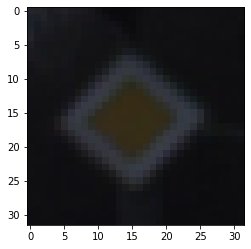

In [0]:
import matplotlib.pyplot as plt
plt.imshow(trainX[2])

In [0]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [0]:
len(classNames.keys())

43

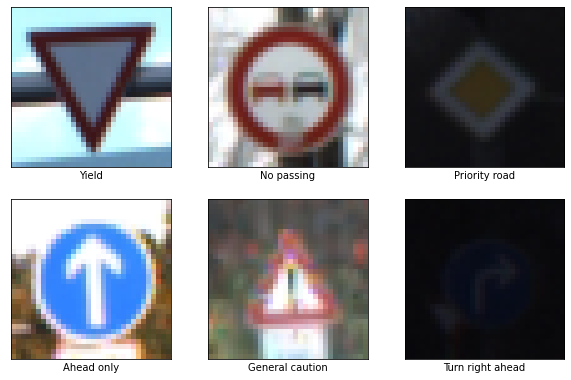

In [0]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainY[i]])
plt.show()

# Chuẩn hoá dữ liệu

In [0]:
trainX = trainX/255.0
testX  = testX/255.0
validX = validX/255.0

In [0]:
trainX[0].shape
print(trainY.shape)
print(testY.shape)
print(validY.shape)

(34799,)
(12630,)
(4410,)


In [0]:
from tensorflow.keras.utils import  to_categorical

In [0]:
trainY = to_categorical(trainY,len(classNames.keys()))
trainY[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
validY = to_categorical(validY,len(classNames.keys()))
validY

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
testY = to_categorical(testY,(len(classNames.keys())))

In [0]:
print(trainY.shape)
print(testY.shape)
print(validY.shape)

(34799, 43)
(12630, 43)
(4410, 43)


# Thiết kế mạng

In [0]:
model   = Sequential()     

In [0]:
model.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),activation='relu',input_shape= [32,32,3],padding=('same')))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.layers import BatchNormalization

In [0]:
model.add(BatchNormalization())  #batchNormalization

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
Total params: 2,560
Trainable params: 2,496
Non-trainable params: 64
_________________________________________________________________


In [0]:
model.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),activation='relu',input_shape= [32,32,32],padding=('same'))) # khong can dat input shape cung dc

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        25632     
Total params: 28,192
Trainable params: 28,128
Non-trainable params: 64
_________________________________________________________________


In [0]:
model.add(BatchNormalization())  #batchNormalization lần 2

In [0]:
model.add(MaxPooling2D((2,2),strides= 2))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
Total params: 28,320
Trainable params: 28,192
Non-trainable params: 128
_________________________________________________________________


In [0]:
model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape= [32,32,32],padding=('same')))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
Total params: 46,816
Trainable params: 46,688
Non-trainable params: 128
________________________________________________

In [0]:
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape= [32,32,32],padding=('same')))
model.add(MaxPooling2D((2,2),strides= 2))

In [0]:
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

Model NetWork

In [0]:
model.add(Dense(512,activation='relu'))
model.add(Dense(43,activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

# Thêm hàm mất mát và hàm tối ưu

In [0]:
model.compile(optimizer='SGD',loss = 'categorical_crossentropy',metrics = ['acc'])

# Tiến hành training

In [0]:
DESIRED_ACCURACY = 0.9

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
model.fit(trainX,trainY,epochs =11 ,verbose =1,callbacks=[callbacks],validation_data=(validX,validY) )

Epoch 1/11
1087/1088 [============================>.] - ETA: 0s - loss: 0.0496 - acc: 0.9890
Reached 90% accuracy so cancelling training!
1088/1088 [==============================] - 16s 15ms/step - loss: 0.0497 - acc: 0.9890 - val_loss: 0.3191 - val_acc: 0.9025


# Tiến hành dự đoán

In [0]:
pre

(12630, 43)

In [0]:
pre = model.predict(testX[:3])

In [0]:
import numpy as np

result = np.argmax(pre, axis = 1)
result

array([ 1, 32,  4])

In [0]:
print(np.argmax(testY[:3], axis = 1))

[ 1 32  4]


In [0]:
test1X = test["features"]
test1Y = test["labels"]

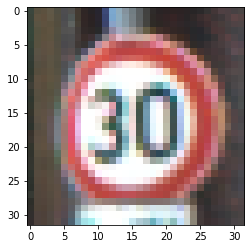

In [0]:
test_image = test1X[1].reshape((32, 32,3))
plt.imshow(test_image)

In [0]:
model.evaluate(testX,testY)

395/395 [==============================] - 3s 7ms/step - loss: 0.3413 - acc: 0.9080


[0.3413306772708893, 0.9079968333244324]